<a href="https://colab.research.google.com/github/Madhavi-sai/FML/blob/main/Simple_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**



In [14]:
#Import required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
#Get the data
diabetes_data = pd.read_csv("/content/diabetes.csv")
diabetes_data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [6]:
X = diabetes_data.drop("diabetes", axis = 1).values
y = diabetes_data['diabetes'].values

In [7]:
print(type(X))
print(type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 8) (768,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:

In [20]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
scalar= StandardScaler()    
X_train= scalar.fit_transform(X_train)    
X_test= scalar.transform(X_test)  

In [19]:
#3. Create model and train it
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
#attributes of your model
model.classes_

array([0, 1])

In [22]:
model.intercept_

array([-0.87388128])

In [23]:
model.coef_

array([[ 0.33565954,  1.03571851, -0.13528263,  0.03489618, -0.14497884,
         0.72912567,  0.2853454 ,  0.16835215]])

In [26]:
#4. Evaluate the model
model.predict_proba(X_test)

array([[0.93223242, 0.06776758],
       [0.42133453, 0.57866547],
       [0.57190633, 0.42809367],
       [0.57473819, 0.42526181],
       [0.90532452, 0.09467548],
       [0.22056424, 0.77943576],
       [0.60132038, 0.39867962],
       [0.80258338, 0.19741662],
       [0.80650441, 0.19349559],
       [0.85957623, 0.14042377],
       [0.83844198, 0.16155802],
       [0.97741391, 0.02258609],
       [0.92895824, 0.07104176],
       [0.77107062, 0.22892938],
       [0.04969143, 0.95030857],
       [0.89667631, 0.10332369],
       [0.98270688, 0.01729312],
       [0.79545862, 0.20454138],
       [0.41600737, 0.58399263],
       [0.6567484 , 0.3432516 ],
       [0.13185773, 0.86814227],
       [0.94287187, 0.05712813],
       [0.68011691, 0.31988309],
       [0.76103671, 0.23896329],
       [0.86253528, 0.13746472],
       [0.7199539 , 0.2800461 ],
       [0.86049974, 0.13950026],
       [0.94501345, 0.05498655],
       [0.38761749, 0.61238251],
       [0.90231548, 0.09768452],
       [0.

In [25]:
#get the actual predictions
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0]


In [27]:
confusion_matrix(y_test, y_pred)

array([[90,  9],
       [25, 30]])

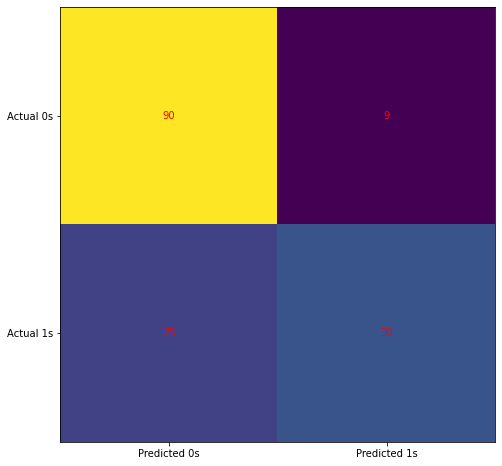

In [28]:
#visualization of confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
#more comprehensive report on the classification 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

